CSTR home assignment question 1, 2 tanks 

here are the equations:


'reactor1:'

Eq(V1*Derivative(CA1(t), t), CA0*f - V1*k*CA1(t) - f*CA1(t))

'reactor2:'

Eq(V2*Derivative(CA2(t), t), -V2*k*CA2(t) + f*CA1(t) - f*CA2(t))

Symbolic solution is:

Eq(CA1(t), CA0*f/(V1*k + f) - CA0*f*exp(-t*(V1*k + f)/V1)/(V1*k + f))

Eq(CA2(t), -CA0*V1*f*exp(-t*(V1*k + f)/V1)/((V1 - V2)*(V1*k + f)) + CA0*V2*f*exp(-t*(V2*k + f)/V2)/((V1 - V2)*(V2*k + f)) + CA0*f*(V1*(V2*k + f) - V2*(V1*k + f))/((V1 - V2)*(V1*k + f)*(V2*k + f)))

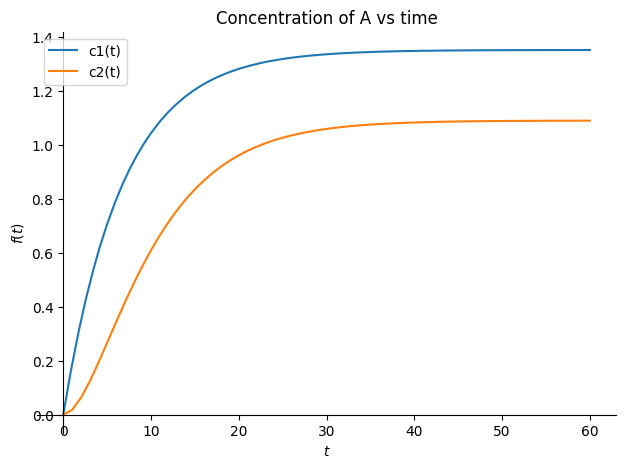

In [8]:
#TODO CHANGE ALL THE PYTHON SCRIPTS TO PYTHON NOTEBOOK, COPY PASTE AND MAKE NEW PYTHON SCIRPTS AND SAVE AS .IPYNB

# PART A: STATE A MODEL (DIFFERENTIAL EQUATION) FOR THE [] OF A IN REACTOR 1 AND FOR REACTOR 2
# WE USE deqn1 and deqn2 for this, recall the mass balance:
# Accumulated = -generated + flow in - flow out


from sympy import *
from IPython.display import display,Math,Markdown

t,f, CA0, V1, V2, k = symbols('t,f, CA0, V1, V2, k', positive=True)
CA1, CA2 = symbols('CA1, CA2',cls=Function) # concentration of A in tank I and II which are the unknowns

deqn1 = Eq(V1*diff(CA1(t),t), f*CA0 - V1*k*CA1(t) -f*CA1(t)) # A mass balance tank I
deqn2 = Eq(V2*diff(CA2(t),t), f*CA1(t) - V2*k*CA2(t) -f*CA2(t)) # A mass balance tank II

print ("here are the equations:")
display ("reactor1:",deqn1)
display ("reactor2:",deqn2) 
 
#PART B: FIND SYMBOLIC EXPRESSIONS FOR THE STEADY STATE [] IN BOTH REACTORS, NOT SOLVING DEQN
#AND FIND NUMBER OF NUMERICAL VALUES USING THE PARAMETERS IN TABLE 1

init_conditions= {CA1(0):0,CA2(0):0} # initial value of concentration.we are told to assume zero
par = [(f,20),(CA0, 2),(V1,200),(V2,100),(k,0.048)] #taken from equation 

symbolic_solution = dsolve((deqn1,deqn2), ics=init_conditions)
display(Markdown('Symbolic solution is:'), symbolic_solution[0],symbolic_solution[1])

"""Using the parameters"""

C_A1sol=symbolic_solution[0].rhs.subs(par)
C_A2sol=symbolic_solution[1].rhs.subs(par)

graphs = plot(C_A1sol,C_A2sol,(t,0,60),legend=True,show=False)
graphs[0].label = 'c1(t)'
graphs[1].label = 'c2(t)'
graphs.title = 'Concentration of A vs time'
graphs.show()